In [1]:
import numpy as np
import scipy.sparse
import h5py
import sys
import os
import pandas as pd
import seaborn as sns

h5_atac = h5py.File("data/asapseq_control_atac.h5", 'r')
h5_rna = h5py.File("data/citeseq_control_rna.h5", 'r')
dset_atac = h5_atac['matrix']
dset_rna = h5_rna['matrix']
dset_atac["data"][::]

df_atac = pd.DataFrame(np.array(h5_atac['matrix/data']))
df_atac.columns =h5_atac['matrix/barcodes']
df_atac.rows = h5_atac['matrix/features']

df_rna = pd.DataFrame(np.array(h5_rna['matrix/data']))
df_rna.columns =h5_rna['matrix/barcodes']
df_rna.rows = h5_rna['matrix/features']

#corrMatrix = df_atac.corr()
#print (corrMatrix)
#pvf_atac=pd.pivot_table(df_atac)
#pvflights = flights.pivot_table(values='passengers',index='month',columns='year')
#sns.heatmap(pvf_atac)

#print(dset_atac["data"][::])

#print(h5_data_atac)

/tmp/ipykernel_170080/1281614912.py:17: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df_atac.rows = h5_atac['matrix/features']
/tmp/ipykernel_170080/1281614912.py:21: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df_rna.rows = h5_rna['matrix/features']


In [76]:
#print(dset_atac["data"][0:10])

print(dset_rna["data"][0:10])


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [1. 1. 1. ... 1. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [2]:
df_atac['rows']=h5_atac['matrix/features']
df_rna['rows']=h5_rna['matrix/features']
df_atac=df_atac.set_index('rows')
df_rna=df_rna.set_index('rows')

#corrMatrix = df_atac.corr()
#print (corrMatrix)

In [3]:
#print(df_atac)
print(df_atac.sum(axis=1))
df_atac_sum=df_atac.sum(axis=1)
print(df_atac.mean(axis=1))
df_atac_mean=df_atac.mean(axis=1)

#df_atac=df_atac.sum(axis=1)
#print(df_atac)
#atac_table=pd.pivot_table(df_atac,index='rows')

rows
b'FAM41C'          696.0
b'AL645608.7'      726.0
b'AL645608.1'      303.0
b'SAMD11'          195.0
b'NOC2L'          2312.0
                  ...   
b'C21orf58'       6118.0
b'PCNT'           2509.0
b'DIP2A'         10675.0
b'S100B'          1100.0
b'PRMT2'          5000.0
Length: 17441, dtype: float64
rows
b'FAM41C'        0.154598
b'AL645608.7'    0.161262
b'AL645608.1'    0.067303
b'SAMD11'        0.043314
b'NOC2L'         0.513550
                   ...   
b'C21orf58'      1.358952
b'PCNT'          0.557308
b'DIP2A'         2.371168
b'S100B'         0.244336
b'PRMT2'         1.110618
Length: 17441, dtype: float64


In [72]:
print(df_atac.sum(axis=0))
print()

b'Control#TATGTTCCACAAGGGT-1'     27554.0
b'Control#AACCGATCACGGTTAT-1'    100787.0
b'Control#ACTACGACAATCCATG-1'     82577.0
b'Control#AGTCAACTCATGAACC-1'    102381.0
b'Control#TACGCCTAGACCAATA-1'     85934.0
                                   ...   
b'Control#GGAACCCAGATACCAA-1'       576.0
b'Control#GAAAGTAGTCATCAAC-1'       602.0
b'Control#GAAATGATCACCCGGA-1'       548.0
b'Control#AGCCTCTCAGTAAGCG-1'       106.0
b'Control#TTAGGTGGTAGCGAGT-1'       500.0
Length: 4502, dtype: float64


In [29]:
#print(df_atac)
print(df_rna.sum(axis=1))
df_rna_sum=df_rna.sum(axis=1)
print(df_rna.mean(axis=1))
df_rna_mean=df_rna.mean(axis=1)

rows
b'FAM41C'          21.0
b'AL645608.7'       0.0
b'AL645608.1'       0.0
b'SAMD11'           5.0
b'NOC2L'          925.0
                  ...  
b'C21orf58'       104.0
b'PCNT'           660.0
b'DIP2A'          816.0
b'S100B'          410.0
b'PRMT2'         6296.0
Length: 17441, dtype: float64
rows
b'FAM41C'        0.004522
b'AL645608.7'    0.000000
b'AL645608.1'    0.000000
b'SAMD11'        0.001077
b'NOC2L'         0.199182
                   ...   
b'C21orf58'      0.022394
b'PCNT'          0.142119
b'DIP2A'         0.175711
b'S100B'         0.088286
b'PRMT2'         1.355728
Length: 17441, dtype: float64


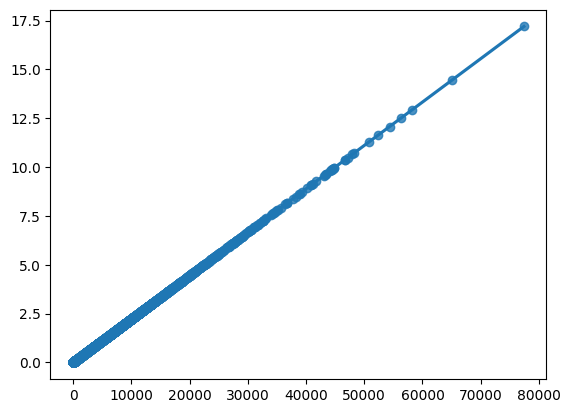

In [4]:
ax = sns.regplot(x=df_atac_sum, y=df_atac_mean)

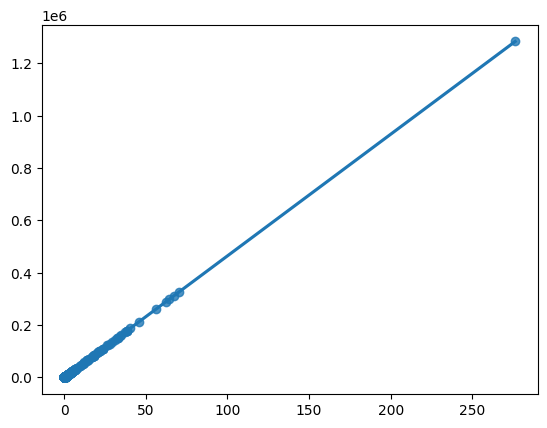

In [30]:
ax = sns.regplot(x=df_rna_mean, y=df_rna_sum)


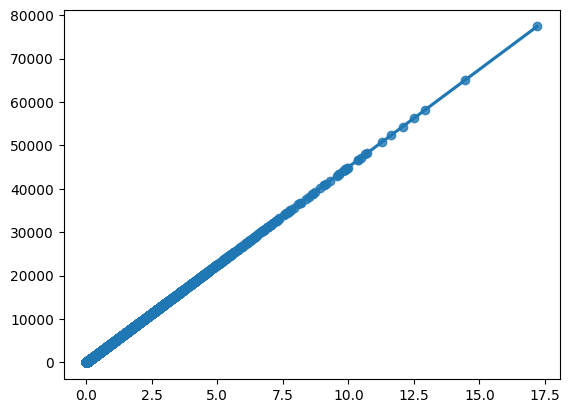

In [5]:
ax = sns.regplot(x=df_atac_mean, y=df_atac_sum)


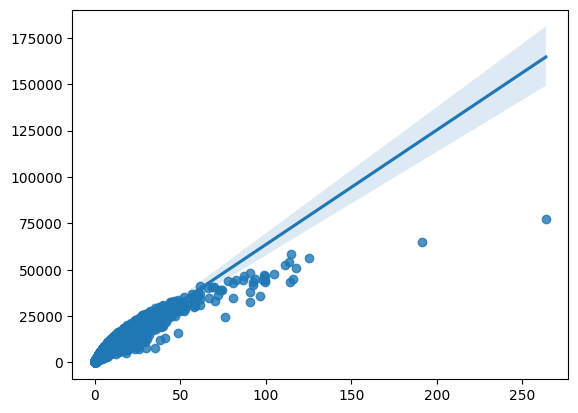

In [6]:
df_atac_var=df_atac.var(axis=1)
ax = sns.regplot(x=df_atac_var, y=df_atac_sum)


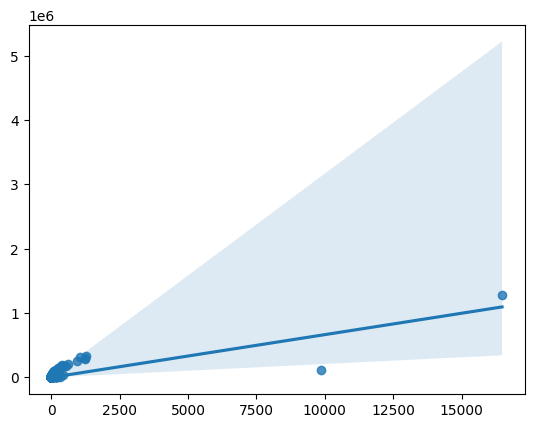

In [31]:
df_rna_var=df_rna.var(axis=1)
ax = sns.regplot(x=df_rna_var, y=df_rna_sum)

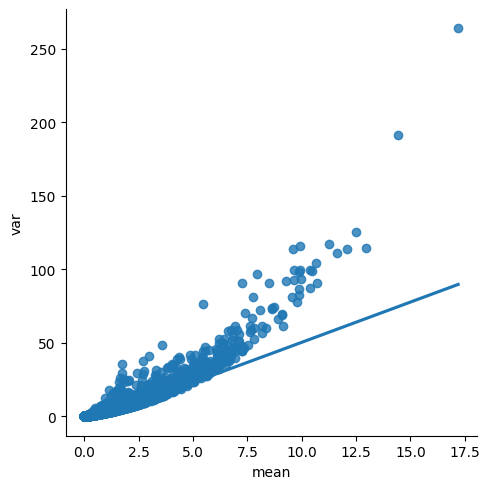

In [25]:

#df_mean_var["rows"]=df_atac_mean
#df_mean_var["columns"]=df_atac_var
#print(df_atac_mean.to_frame())
df_mean_var=pd.DataFrame({'mean':df_atac_mean.values, 'var':df_atac_var.values})
#df_mean_var=pd.DataFrame({df_atac_mean.to_frame(),df_atac_var.to_frame()})
#print(df_mean_var)
ax = sns.lmplot(x="mean", y="var", data= df_mean_var, lowess=True)

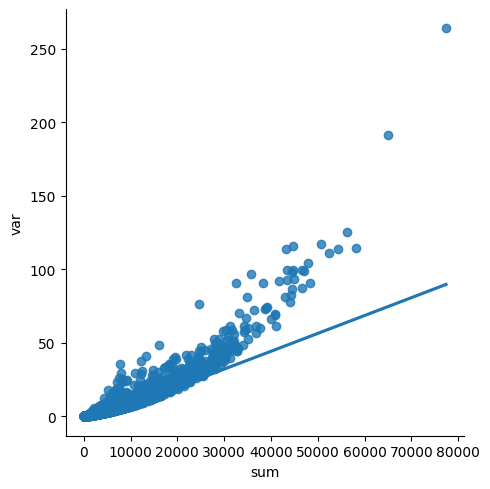

In [26]:
#df_mean_var["rows"]=df_atac_mean
#df_mean_var["columns"]=df_atac_var
#print(df_atac_mean.to_frame())
df_sum_var=pd.DataFrame({'sum':df_atac_sum.values, 'var':df_atac_var.values})
#df_mean_var=pd.DataFrame({df_atac_mean.to_frame(),df_atac_var.to_frame()})
#print(df_mean_var)
ax = sns.lmplot(x="sum", y="var", data= df_sum_var, lowess=True)

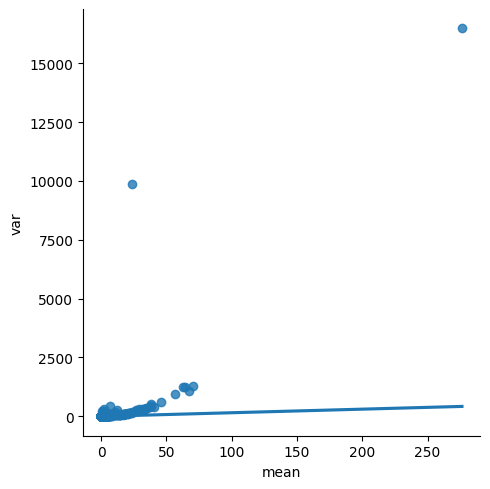

In [32]:
#df_mean_var["rows"]=df_atac_mean
#df_mean_var["columns"]=df_atac_var
#print(df_atac_mean.to_frame())
df_rna_mean_var=pd.DataFrame({'mean':df_rna_mean.values, 'var':df_rna_var.values})
#df_mean_var=pd.DataFrame({df_atac_mean.to_frame(),df_atac_var.to_frame()})
#print(df_mean_var)
ax = sns.lmplot(x="mean", y="var", data= df_rna_mean_var, lowess=True)

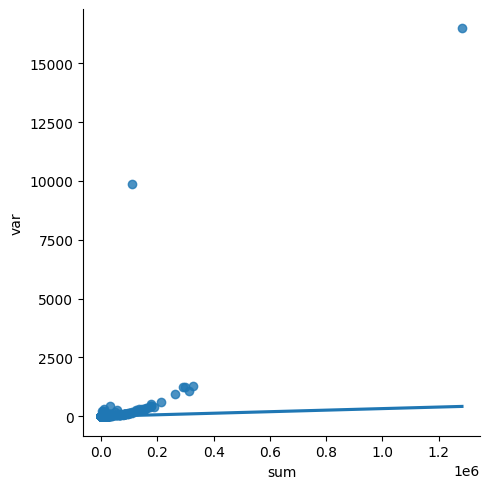

In [33]:
#df_mean_var["rows"]=df_atac_mean
#df_mean_var["columns"]=df_atac_var
#print(df_atac_mean.to_frame())
df_rna_sum_var=pd.DataFrame({'sum':df_rna_sum.values, 'var':df_rna_var.values})
#df_mean_var=pd.DataFrame({df_atac_mean.to_frame(),df_atac_var.to_frame()})
#print(df_mean_var)
ax = sns.lmplot(x="sum", y="var", data= df_rna_sum_var, lowess=True)

In [28]:
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [35]:
print(dset_atac["data"][::])

[[ 0.  0.  0. ...  0.  0.  0.]
 [ 4.  2.  0. ...  0.  0.  0.]
 [ 0.  0.  2. ...  0.  0.  0.]
 ...
 [ 4. 16. 15. ...  2.  0.  0.]
 [ 0.  2.  0. ...  0.  0.  0.]
 [ 2.  4.  6. ...  0.  0.  0.]]


In [36]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(dset_atac["data"][::])

In [37]:
kmeans = KMeans(init="random",n_clusters=3,n_init=10,max_iter=300,random_state=42)


In [38]:
kmeans.fit(scaled_features)

KMeans(init='random', n_clusters=3, random_state=42)

In [39]:
kmeans.inertia_
kmeans.cluster_centers_
kmeans.n_iter_

25

In [40]:
kmeans.labels_[:5]

array([2, 2, 2, 2, 2], dtype=int32)

In [41]:
kmeans_kwargs = {"init": "random","n_init": 10, "max_iter": 300,"random_state": 42,}
# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

KeyboardInterrupt: 

Exception ignored in: 'sklearn.cluster._k_means_common._relocate_empty_clusters_dense'
Traceback (most recent call last):
  File "<__array_function__ internals>", line 177, in where
KeyboardInterrupt: 


KeyboardInterrupt: 

Exception ignored in: 'sklearn.cluster._k_means_common._relocate_empty_clusters_dense'
Traceback (most recent call last):
  File "<__array_function__ internals>", line 177, in where
KeyboardInterrupt: 


KeyboardInterrupt: 

Exception ignored in: 'sklearn.cluster._k_means_common._relocate_empty_clusters_dense'
Traceback (most recent call last):
  File "<__array_function__ internals>", line 177, in where
KeyboardInterrupt: 


In [ ]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [ ]:
kl = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")
kl.elbow

In [43]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
from sklearn.metrics import adjusted_rand_score

kmeans = KMeans(n_clusters=3)
dbscan = DBSCAN(eps=0.3)
# Fit the algorithms to the features
kmeans.fit(scaled_features)
dbscan.fit(scaled_features)
# Compute the silhouette scores for each algorithm
kmeans_silhouette = silhouette_score(scaled_features, kmeans.labels_).round(2)
dbscan_silhouette = silhouette_score(scaled_features, dbscan.labels_).round (2)
kmeans_silhouette
dbscan_silhouette

KeyboardInterrupt: 

In [44]:
import tarfile
import urllib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [45]:
uci_tcga_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00401/"
archive_name = "TCGA-PANCAN-HiSeq-801x20531.tar.gz"

# Build the url
full_download_url = urllib.parse.urljoin(uci_tcga_url, archive_name)
# Download the file
r = urllib.request.urlretrieve (full_download_url, archive_name)
# Extract the data from the archive
tar = tarfile.open(archive_name, "r:gz")
tar.extractall()
tar.close()

In [55]:
datafile = "TCGA-PANCAN-HiSeq-801x20531/data.csv"
labels_file = "TCGA-PANCAN-HiSeq-801x20531/labels.csv"
data = np.genfromtxt(datafile,delimiter=",",usecols=range(1, 20532),skip_header=1)
true_label_names = np.genfromtxt(labels_file,delimiter=",",usecols=(1,),skip_header=1,dtype="str")
#print(true_label_names)

['PRAD' 'LUAD' 'PRAD' 'PRAD' 'BRCA' 'PRAD' 'KIRC' 'PRAD' 'BRCA' 'PRAD'
 'BRCA' 'KIRC' 'PRAD' 'BRCA' 'BRCA' 'BRCA' 'LUAD' 'KIRC' 'KIRC' 'PRAD'
 'BRCA' 'KIRC' 'LUAD' 'BRCA' 'KIRC' 'LUAD' 'COAD' 'BRCA' 'BRCA' 'BRCA'
 'BRCA' 'BRCA' 'KIRC' 'BRCA' 'PRAD' 'BRCA' 'KIRC' 'LUAD' 'BRCA' 'BRCA'
 'KIRC' 'PRAD' 'PRAD' 'KIRC' 'KIRC' 'BRCA' 'PRAD' 'COAD' 'BRCA' 'LUAD'
 'BRCA' 'LUAD' 'BRCA' 'PRAD' 'COAD' 'BRCA' 'BRCA' 'COAD' 'KIRC' 'BRCA'
 'LUAD' 'KIRC' 'BRCA' 'LUAD' 'PRAD' 'COAD' 'BRCA' 'PRAD' 'KIRC' 'BRCA'
 'KIRC' 'BRCA' 'BRCA' 'LUAD' 'BRCA' 'LUAD' 'BRCA' 'KIRC' 'PRAD' 'COAD'
 'BRCA' 'PRAD' 'BRCA' 'BRCA' 'PRAD' 'PRAD' 'BRCA' 'BRCA' 'KIRC' 'BRCA'
 'PRAD' 'PRAD' 'BRCA' 'BRCA' 'BRCA' 'PRAD' 'COAD' 'BRCA' 'PRAD' 'BRCA'
 'BRCA' 'KIRC' 'BRCA' 'KIRC' 'LUAD' 'KIRC' 'LUAD' 'COAD' 'LUAD' 'LUAD'
 'PRAD' 'BRCA' 'LUAD' 'PRAD' 'BRCA' 'KIRC' 'KIRC' 'KIRC' 'BRCA' 'BRCA'
 'LUAD' 'KIRC' 'LUAD' 'BRCA' 'PRAD' 'PRAD' 'PRAD' 'BRCA' 'KIRC' 'LUAD'
 'COAD' 'BRCA' 'COAD' 'BRCA' 'BRCA' 'KIRC' 'LUAD' 'BRCA' 'KIRC' 'COAD'
 'BRCA

In [56]:
data=dset_atac["data"][::]
true_label_names=dset_atac["features"][::]
print(data)
print(true_label_names)

[[ 0.  0.  0. ...  0.  0.  0.]
 [ 4.  2.  0. ...  0.  0.  0.]
 [ 0.  0.  2. ...  0.  0.  0.]
 ...
 [ 4. 16. 15. ...  2.  0.  0.]
 [ 0.  2.  0. ...  0.  0.  0.]
 [ 2.  4.  6. ...  0.  0.  0.]]
[b'FAM41C' b'AL645608.7' b'AL645608.1' ... b'DIP2A' b'S100B' b'PRMT2']


In [49]:
label_encoder = LabelEncoder()
true_labels = label_encoder.fit_transform(true_label_names)
label_encoder.classes_
n_clusters = len(label_encoder.classes_)

In [50]:
preprocessor = Pipeline([("scaler", MinMaxScaler()),("pca", PCA(n_components=2, random_state=42)),])

In [51]:
clusterer = Pipeline([("kmeans",KMeans(n_clusters=n_clusters,init="k-means++",n_init=50,max_iter=500,random_state=42,),),])

In [52]:
pipe = Pipeline([("preprocessor", preprocessor),("clusterer", clusterer)])

In [53]:
pipe.fit(data)

KeyboardInterrupt: 

In [54]:
preprocessed_data = pipe["preprocessor"].transform(data)
predicted_labels = pipe["clusterer"]["kmeans"].labels_
silhouette_score(preprocessed_data, predicted_labels)

AttributeError: 'KMeans' object has no attribute 'labels_'

In [ ]:
adjusted_rand_score(true_labels, predicted_labels)

In [ ]:
pcadf = pd.DataFrame(pipe["preprocessor"].transform(data),columns=["component_1", "component_2"],)
pcadf["predicted_cluster"] = pipe["clusterer"]["kmeans"].labels_
pcadf["true_label"] = label_encoder.inverse_transform(true_labels)

plt.style.use("fivethirtyeight")
plt.figure(figsize=(8, 8))
scat = sns.scatterplot("component_1","component_2",s=50,data=pcadf,hue="predicted_cluster",style="true_label",palette="Set2",)
scat.set_title("Clustering results from TCGA Pan-Cancer\nGene Expression Data")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
plt.show()

In [61]:
from sklearn.cluster import KMeans
#df = pd.DataFrame(df_atac, columns=['var1', 'var2'])

kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0).fit(df_rna_sum_var)


In [64]:
print(df_rna_sum_var)

          sum       var
0        21.0  0.004502
1         0.0  0.000000
2         0.0  0.000000
3         5.0  0.001076
4       925.0  0.212526
...       ...       ...
17436   104.0  0.029221
17437   660.0  0.180530
17438   816.0  0.194405
17439   410.0  0.280810
17440  6296.0  2.135761

[17441 rows x 2 columns]


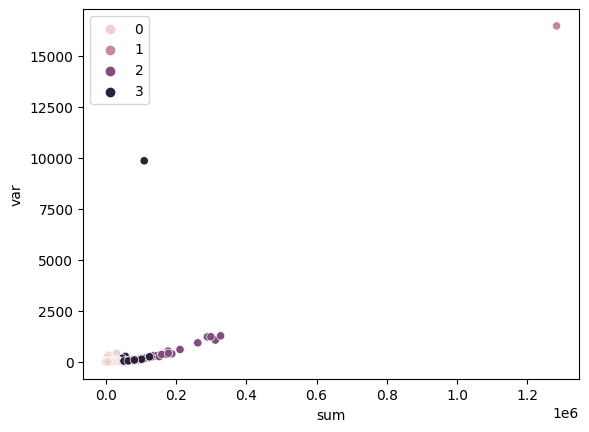

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(data=df_rna_sum_var, x="sum", y="var", hue=kmeans.labels_)
plt.show()


In [67]:
from sklearn.cluster import KMeans
#df = pd.DataFrame(df_atac, columns=['var1', 'var2'])

kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0).fit(df_rna_mean_var)


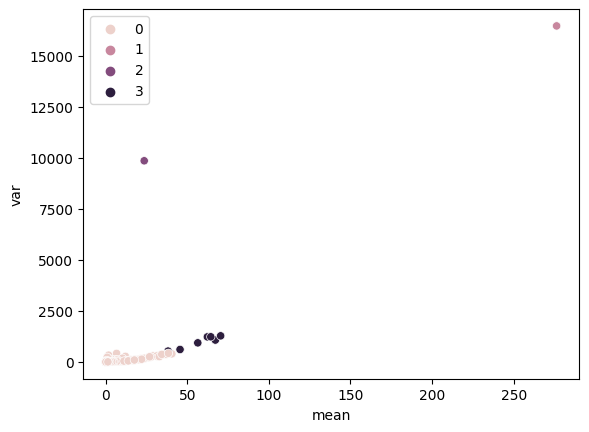

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(data=df_rna_mean_var, x="mean", y="var", hue=kmeans.labels_)
plt.show()


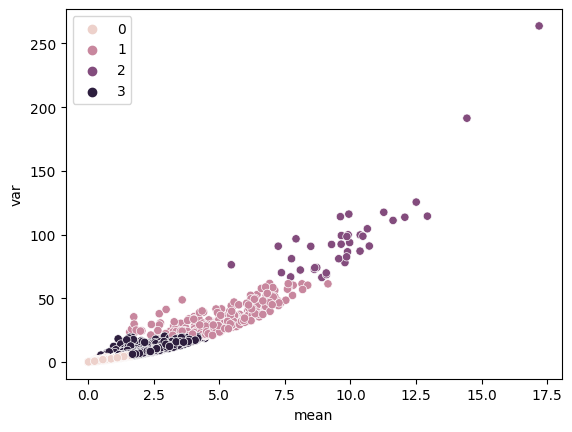

In [69]:
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
#df = pd.DataFrame(df_atac, columns=['var1', 'var2'])

kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0).fit(df_mean_var)
sns.scatterplot(data=df_mean_var, x="mean", y="var", hue=kmeans.labels_)
plt.show()


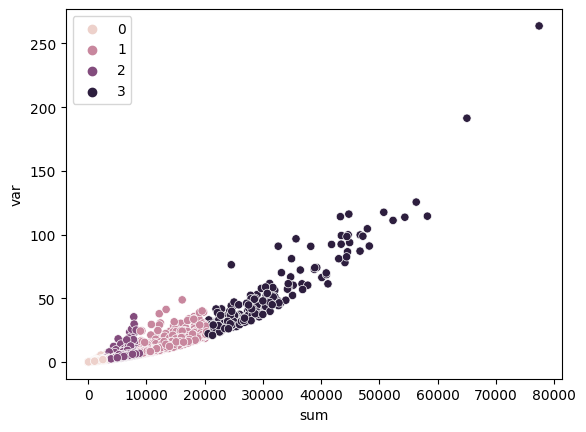

In [71]:
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
#df = pd.DataFrame(df_atac, columns=['var1', 'var2'])

kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0).fit(df_sum_var)
sns.scatterplot(data=df_sum_var, x="sum", y="var", hue=kmeans.labels_)
plt.show()
